## 线性规划

$$
\begin{aligned}
&\max \quad z = x_1 - 2x_2 - 3x_3,\\
&s.t. \quad
\begin{cases}
-2x_1 + x_2 + x_3 \leq 9,\\
-3x_1 + x_2 + 2x_3 \geq 4,\\
4x_1 - 2x_2 - x_3 = -6,\\
x_1 \geq -10, x_2 \geq 0, x_3\text{取值无约束}.
\end{cases}
\end{aligned}
$$

书P179

In [1]:
import numpy as np
from scipy.optimize import linprog

c = np.array([1, -2, -3])
A = [[-2, 1, 1],
    [3, -1, -2]]
b = [9, -4]
A_eq = [[4, -2, -1]]
b_eq = [-6]
bnds = [[-10, None],
        [0, None],
        [None, None]]

res = linprog(-c, A, b, A_eq, b_eq, bounds=bnds)
res.fun *= -1
res

     con: array([2.38733922e-09])
     fun: -0.4000000006525579
 message: 'Optimization terminated successfully.'
     nit: 4
   slack: array([6.20000000e+00, 1.71777259e-09])
  status: 0
 success: True
       x: array([-1.60000000e+00,  8.29738643e-11, -4.00000000e-01])

In [2]:
import numpy as np
import cvxpy as cp 

c = np.array([1, -2, -3])
A = np.array([[-2, 1, 1],
              [3, -1, -2]])
b = np.array([9, -4])
A_eq = np.array([[4, -2, -1]])
b_eq = np.array([-6])

x = cp.Variable(3)
obj = cp.Maximize(c @ x)
cons = [A @ x <= b, A_eq @ x == b_eq,
        x[0] >= -10, x[1] >= 0]
prob = cp.Problem(obj, cons)
prob.solve()

print(prob.value, x.value, sep='\n')

-0.3999999999508941
[-1.60000000e+00 -2.91490741e-11 -4.00000000e-01]


## 整数规划

$$
\begin{aligned}
&\min \quad z = 40x_1 + 90x_2,\\
&s.t. \quad
\begin{cases}
9x_1 + 7x_2 \leq 56,\\
7x_1 + 20x_2 \geq 70,\\
x_1, x_2 \geq 0 \text{为整数}.
\end{cases}
\end{aligned}
$$

书P196

In [15]:
import numpy as np
import cvxpy as cp 

c = np.array([40, 90])
A = np.array([[9, 7],
              [-7, -20]])
b = np.array([56, -70])

x = cp.Variable(2, integer=True) # 声明整数
obj = cp.Minimize(c @ x)
cons = [A @ x <= b, x >= 0]
prob = cp.Problem(obj, cons)
prob.solve(solver="GLPK_MI") # 线性整数规划问题
# prob.solve(solver="ECOS_BB")
# prob.solve(solver="SCIP")

print(prob.value, x.value, sep='\n')

350.0
[2. 3.]


<h1 style="color: lightblue; text-align: center; font-weight: bold">非线性规划与模拟退火<h1>


## 非线性规划

### 一般形式

$$
\begin{aligned}
&\min \quad f(x),\\
&s.t. \quad
\begin{cases}
g_i(x) \leq 0, i = 1, 2, \cdots, m,\\
h_j(x) = 0, j = 1, 2, \cdots, l.
\end{cases}
\end{aligned}
$$

### 无约束非线性规划

$$
\begin{aligned}
&\min \quad \frac{2 + x_1}{1 + x_2} - 3x_1 + 4x_3,\\
&s.t. \quad 0.1 \leq x_i \leq 0.9, \quad i = 1, 2, 3.
\end{aligned}
$$

书P206

In [4]:
import numpy as np
from scipy.optimize import minimize

def obj(x): # 推荐这种清晰的写法
    x1, x2, x3 = x
    return (2+x1)/(1+x2) - 3*x1 + 4*x3

bnds = list(zip([.1]*3, [.9]*3))
# bnds = np.tile([0.1, 0.9], (3, 1))
res = minimize(obj, np.ones(3), bounds=bnds)
res

      fun: -0.7736842105263159
 hess_inv: <3x3 LbfgsInvHessProduct with dtype=float64>
      jac: array([-2.47368422, -0.80332409,  4.        ])
  message: 'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
     nfev: 8
      nit: 1
     njev: 2
   status: 0
  success: True
        x: array([0.9, 0.9, 0.1])

### 有约束非线性规划

$$
\begin{aligned}
&\max \quad z = x_1^2 + x_2^2 + 3x_3^2 + 4x_4^2 + 2x_5^2 - 8x_1 -2x_2 -3x_3 - x_4 -2x_5,\\
&s.t. \quad
\begin{cases}
x_1 + x_2 + x_3 + x_4 + x_5 \leq 400,\\
x_1 + 2x_2 + 2x_3 + x_4 + 6x_5 \leq 800,\\
2x_1 + x_2 + 6x_3 \leq 200,\\
x_3 + x_4 + 5x_5 \leq 200,\\
0 \leq x_i \leq 99, \quad i = 1, 2, 3, 4, 5.
\end{cases}
\end{aligned}
$$

书P206

In [5]:
import numpy as np
from scipy.optimize import minimize

def obj(x):
    c1 = np.array([1, 1, 3, 4, 2])
    c2 = np.array([-8, -2, -3, -1, -2])
    return -(lambda x: c1 @ x**2 + c2 @ x)(x) # 记得加负号

A = np.array([[1, 1, 1, 1, 1],
              [1, 2, 2, 1, 6],
              [2, 1, 6, 0, 0],
              [0, 0, 1, 1, 5]])
b = np.array([400, 800, 200, 200])
bnds = list(zip([0]*5, [99]*5))
cons = {'type': 'ineq',
        'fun': lambda x: b - A @ x} # 保证'fun'>=0
res = minimize(obj, np.ones(5)*100, method='SLSQP', constraints=cons, bounds=bnds)
# 只能求出局部极值，要多尝试几个初值
res.fun *= -1
res

     fun: 51629.929994628765
     jac: array([ -93.        , -196.        ,    3.        , -791.        ,
        -78.80029297])
 message: 'Optimization terminated successfully'
    nfev: 15
     nit: 2
    njev: 2
  status: 0
 success: True
       x: array([5.05000000e+01, 9.90000000e+01, 1.46601756e-09, 9.90000000e+01,
       2.02000000e+01])

### 非线性整数规划

$$
\begin{aligned}
&\min \quad z = x_1^2 + x_2^2 + 3x_3^2 + 4x_4^2 + 2x_5^2 - 8x_1 -2x_2 -3x_3 - x_4 -2x_5,\\
&s.t. \quad
\begin{cases}
x_1 + x_2 + x_3 + x_4 + x_5 \leq 400,\\
x_1 + 2x_2 + 2x_3 + x_4 + 6x_5 \leq 800,\\
2x_1 + x_2 + 6x_3 \leq 200,\\
x_3 + x_4 + 5x_5 \leq 200,\\
0 \leq x_i \leq 99,\text{且}x_i\text{为整数} \quad i = 1, 2, 3, 4, 5.
\end{cases}
\end{aligned}
$$

书P206

In [53]:
# FIXME: 若为Maximize则不可以用cvxpy解决，因为该问题非凸，不符合DCP规则？
# DEBUG: 要用solver='ECOS_BB'才可以
import numpy as np
import cvxpy as cp 

c1 = np.array([1, 1, 3, 4, 2])
c2 = np.array([-8, -2, -3, -1, -2])
A = np.array([[1, 1, 1, 1, 1],
              [1, 2, 2, 1, 6],
              [2, 1, 6, 0, 0],
              [0, 0, 1, 1, 5]])
b = np.array([400, 800, 200, 200])

x = cp.Variable(5, integer=True)
obj = cp.Minimize(c1 @ cp.square(x) + c2 @ x)
cons = [A @ x <= b, 0 <= x, x <= 99]
prob = cp.Problem(obj, cons)
prob.solve(solver='ECOS_BB') #
# prob.solve()
print(prob.value, x.value, sep='\n')

-16.999999832133735
[3.99999432e+00 9.99960061e-01 5.61070061e-09 7.70566017e-09
 1.00000010e+00]


### cvxpy求解库的使用

适用情形：

### scipy.optimize求解库的使用

#### 一、 minimize_scalar(): 单变量标量函数，不需要给出初始估计

![](https://cdn.jsdelivr.net/gh/acryan54/images@main/pic/202207221448271.png)

- 'Brent': 无范围约束，局部最小值

- **'bounded'**: 有范围约束，局部最小值，是Brent的改进

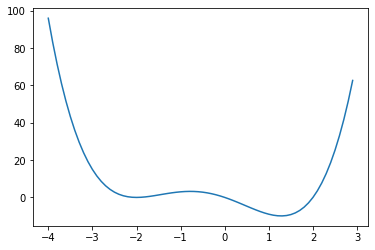

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import minimize_scalar

def f(x):
    return (x - 2) * x * (x + 2)**2

X = np.arange(-4, 3, 0.1)
plt.plot(X, f(X))
plt.show()

In [4]:
res = minimize_scalar(f) # brent是默认方法
res

     fun: -9.914949590828147
    nfev: 15
     nit: 11
 success: True
       x: 1.2807764040333458

In [10]:
res = minimize_scalar(f, bounds=[-30, -3]) # method='bounded'
res

     fun: -9.914949590828147
    nfev: 15
     nit: 11
 success: True
       x: 1.2807764040333458

例：Rosenbrock函数
$$
\begin{aligned}
f(x, y) &= \frac{1}{2} (1 - x)^2 + (y - x^2)^2\\
Jf(x, y) &=
\begin{pmatrix}
4x^3 - 4xy + x - 1\\
2y - 2x^2
\end{pmatrix}\\
Hf(x, y) &=
\begin{pmatrix}
12x^2 - 4y + 1 & -4x\\
-4x & 2
\end{pmatrix}\\
\end{aligned}
$$

#### 二、 minimize(): 单/多变量标量函数，需要给出初始估计

![](https://cdn.jsdelivr.net/gh/acryan54/images@main/pic/202207221449088.png)

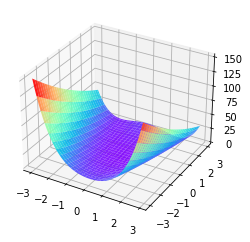

In [10]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import minimize

def F(x, y):   # The rosenbrock function
    return 0.5*(1 - x)**2 + (y - x**2)**2
X = np.arange(-3, 3, 0.1)
Y = np.arange(-3, 3, 0.1)
X, Y = np.meshgrid(X, Y)
Z = F(X, Y)
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.plot_surface(X, Y, Z, alpha=0.9, cmap='rainbow')
plt.show() 

C:\Users\rYan\AppData\Local\Temp\ipykernel_21280\1601998930.py:2: UserWarning: The following kwargs were not used by contour: 'linewidth'
  line = plt.contour(X, Y, Z, 8, colors='black', linewidth=8)


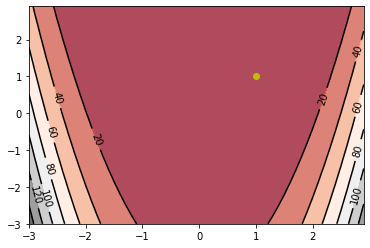

In [11]:
plt.contourf(X, Y, Z, 8, alpha=0.75 ,cmap='RdGy')
line = plt.contour(X, Y, Z, 8, colors='black', linewidth=8)
plt.clabel(line, inline=True, fontsize=10)
plt.scatter([1], [1], color='y')

#### CASE1: 无约束，局部优化，依赖梯度计算

- 'CG': 共轭梯度法，依赖一阶导数，可选给出jacobi矩阵

- **'Newton-CG'**: 牛顿法，依赖二阶导数，必选给出jacobi矩阵，可选给出hessian矩阵

- **'BFGS'**: 一种拟牛顿法，必选给出jacobi矩阵

- **'L-BFGS-B'**: BFGS的内存改进版本，必选给出jacobi矩阵（大规模计算）

注：L-BFGS-B可以用bounds限制变量范围

In [12]:
import numpy as np
from scipy.optimize import minimize

def f(x):
    x, y = x
    return 0.5*(1 - x)**2 + (y - x**2)**2

res = minimize(f, [2,-1], method="CG")
res

     fun: 1.6486281937428067e-11
     jac: array([-6.15024682e-06,  2.53707854e-07])
 message: 'Optimization terminated successfully.'
    nfev: 81
     nit: 13
    njev: 27
  status: 0
 success: True
       x: array([0.99999426, 0.99998864])

In [13]:
import numpy as np
from scipy.optimize import minimize

def f(x):
    x, y = x
    return 0.5*(1 - x)**2 + (y - x**2)**2
def f_jac(x):
    x, y = x 
    return np.array([4*x**3 - 4*x*y + x - 1,
                     2*y - 2*x**2])

bnds = np.array([[-10, None], [-5, None]])
# bnds = np.array([[-10, -5], [5, 10]])
res = minimize(f, [2, 0], method="L-BFGS-B", jac=f_jac, bounds=bnds)
res

      fun: 5.77995930732604e-15
 hess_inv: <2x2 LbfgsInvHessProduct with dtype=float64>
      jac: array([ 3.19967228e-07, -1.35805010e-07])
  message: 'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
     nfev: 14
      nit: 13
     njev: 14
   status: 0
  success: True
        x: array([1.00000005, 1.00000003])

In [14]:
import numpy as np
from scipy.optimize import minimize

def f(x):
    x, y = x
    return 0.5*(1 - x)**2 + (y - x**2)**2
def f_jac(x):
    x, y = x 
    return np.array([4*x**3 - 4*x*y + x - 1,
                     2*y - 2*x**2])
def f_hess(x):
    x, y = x
    return np.array([[12*x**2 - 4*y + 1, -4*x],
                     [-4*x, 2]])
    
res = minimize(f, [3, 2], method="Newton-CG", jac=f_jac, hess=f_hess)
res

     fun: 8.020253358886544e-25
     jac: array([-1.45877652e-07, -3.66223772e-07])
 message: 'Optimization terminated successfully.'
    nfev: 15
    nhev: 12
     nit: 12
    njev: 15
  status: 0
 success: True
       x: array([1., 1.])

#### CASE2: 无约束，局部优化，不依赖梯度计算

- 'Powell':
- **'Nelder-Mead'**: 不要与Dantzig的线性规划单纯形法混淆，对不光滑函数也有效

<!-- ![](https://cdn.jsdelivr.net/gh/acryan54/images@main/pic/202207221430769.png) -->

In [51]:
import numpy as np
from scipy.optimize import minimize

def f(x):
    x, y = x
    return 0.5*(1 - x)**2 + (y - x**2)**2

res = minimize(f, [2,-1], method="Nelder-Mead", bounds=[[-10, 10], [-10, 10]])
res

 final_simplex: (array([[1.00001481, 1.00002828],
       [0.9999825 , 0.9999643 ],
       [1.00001465, 1.0000095 ]]), array([1.11527916e-10, 1.53677305e-10, 4.98835768e-10]))
           fun: 1.11527915993744e-10
       message: 'Optimization terminated successfully.'
          nfev: 111
           nit: 58
        status: 0
       success: True
             x: array([1.00001481, 1.00002828])

#### 三、 brute(): 单/多变量标量函数，需要给出初始估计


#### CASE3: 全局优化，给定范围

- **'brute'**: 暴力算法

- 以及一系列群体智能算法：如蚁群算法

![](https://cdn.jsdelivr.net/gh/acryan54/images@main/pic/202207221454015.png)

In [2]:
import numpy as np
from scipy import optimize
from scipy.optimize import brute

def f(x):
    x, y = x
    return 0.5*(1 - x)**2 + (y - x**2)**2

rngs = [[-5, 5],
        [-5, 5]]

res = brute(f, ranges=rngs, Ns = 20, full_output=True, finish=None)
# res = brute(f, ranges=rngs, Ns = 20, full_output=True, finish=optimize.fmin)
# Ns为grid每个维度的点数，默认为20
# finish为润色函数，默认为optimize.fmin()，即Nelder-Mead
res

(array([0.78947368, 0.78947368]),
 0.04978476224092844,
 array([[[-5.        , -5.        , -5.        , -5.        ,
          -5.        , -5.        , -5.        , -5.        ,
          -5.        , -5.        , -5.        , -5.        ,
          -5.        , -5.        , -5.        , -5.        ,
          -5.        , -5.        , -5.        , -5.        ],
         [-4.47368421, -4.47368421, -4.47368421, -4.47368421,
          -4.47368421, -4.47368421, -4.47368421, -4.47368421,
          -4.47368421, -4.47368421, -4.47368421, -4.47368421,
          -4.47368421, -4.47368421, -4.47368421, -4.47368421,
          -4.47368421, -4.47368421, -4.47368421, -4.47368421],
         [-3.94736842, -3.94736842, -3.94736842, -3.94736842,
          -3.94736842, -3.94736842, -3.94736842, -3.94736842,
          -3.94736842, -3.94736842, -3.94736842, -3.94736842,
          -3.94736842, -3.94736842, -3.94736842, -3.94736842,
          -3.94736842, -3.94736842, -3.94736842, -3.94736842],
         [-

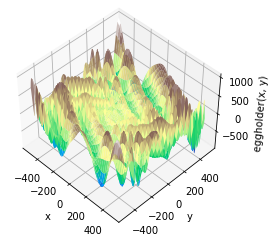

In [43]:
# FIXME:
def eggholder(x):
    return (-(x[1] + 47) * np.sin(np.sqrt(abs(x[0]/2 + (x[1]  + 47))))
            -x[0] * np.sin(np.sqrt(abs(x[0] - (x[1]  + 47)))))

bounds = [(-512, 512), (-512, 512)]

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

x = np.arange(-512, 513)
y = np.arange(-512, 513)
xgrid, ygrid = np.meshgrid(x, y)
xy = np.stack([xgrid, ygrid])

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.view_init(45, -45)
ax.plot_surface(xgrid, ygrid, eggholder(xy), cmap='terrain')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('eggholder(x, y)')
plt.show()

In [44]:
from scipy import optimize
results = dict()
results['shgo'] = optimize.shgo(eggholder, bounds)
results['shgo']

     fun: -935.3379515604948
    funl: array([-935.33795156])
 message: 'Optimization terminated successfully.'
    nfev: 47
     nit: 2
   nlfev: 42
   nlhev: 0
   nljev: 10
 success: True
       x: array([439.48097554, 453.97741501])
      xl: array([[439.48097554, 453.97741501]])

In [45]:
results['DA'] = optimize.dual_annealing(eggholder, bounds)
results['DA']

     fun: -888.949125269823
 message: ['Maximum number of iteration reached']
    nfev: 4043
    nhev: 0
     nit: 1000
    njev: 14
  status: 0
 success: True
       x: array([347.32697704, 499.41538614])

In [46]:
results['DE'] = optimize.differential_evolution(eggholder, bounds)
results['DE']

     fun: -935.3379515587558
     jac: array([-4.5474699e-05, -4.5474699e-05])
 message: 'Optimization terminated successfully.'
    nfev: 801
     nit: 25
 success: True
       x: array([439.48089974, 453.97733909])

In [47]:
results['BH'] = optimize.basinhopping(eggholder, bounds)
results['BH']

                        fun: -565.9977809710114
 lowest_optimization_result:       fun: -565.9977809710114
 hess_inv: array([[15.33945652, -3.73858151,  0.        ,  0.        ],
       [-3.73858151,  2.51049119,  0.        ,  0.        ],
       [ 0.        ,  0.        ,  1.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        ,  1.        ]])
      jac: array([0., 0., 0., 0.])
  message: 'Optimization terminated successfully.'
     nfev: 60
      nit: 10
     njev: 12
   status: 0
  success: True
        x: array([-105.87688637,  423.15323396, -511.79720207,  513.00492491])
                    message: ['requested number of basinhopping iterations completed successfully']
      minimization_failures: 0
                       nfev: 4300
                        nit: 100
                       njev: 860
                    success: True
                          x: array([-105.87688637,  423.15323396, -511.79720207,  513.00492491])

In [48]:
results['shgo_sobol'] = optimize.shgo(eggholder, bounds, n=200, iters=5,sampling_method='sobol')
results['shgo_sobol']

     fun: -959.6406627208498
    funl: array([-959.64066272, -959.64066272, -959.64066272, -935.33795156,
       -935.33795156, -935.33795156, -935.33795156, -935.33795156,
       -935.33795156, -894.57890039, -894.57890039, -894.57890039,
       -894.57890039, -894.57890039, -894.57890039, -894.57890039,
       -894.57890039, -894.57890039, -894.57890039, -888.94912527,
       -888.94912527, -888.94912527, -888.94912527, -888.94912527,
       -821.19646107, -821.19646107, -821.19646107, -821.19646107,
       -821.19646107, -821.19646107, -821.19646107, -821.19646107,
       -821.19646107, -786.52599408, -786.52599408, -786.52599408,
       -786.52599408, -753.05015469, -753.05015469, -738.03782981,
       -738.03782981, -738.03782981, -738.03782981, -738.03782981,
       -738.03782981, -718.16745962, -718.16745962, -718.16745962,
       -718.16745962, -718.16745962, -718.16745962, -718.16745962,
       -716.67150034, -716.67150034, -716.67150034, -716.67150034,
       -716.67150034, -


![](https://cdn.jsdelivr.net/gh/acryan54/images@main/pic/202207221543903.png)

#### CASE4 有约束，局部优化

- 'COBYLA': 支持不等式约束
- **'SLSQP'**: 支持等式、不等式约束(可选给出jacobi矩阵)

![](https://cdn.jsdelivr.net/gh/acryan54/images@main/pic/202207221610921.png)

注1：'ineq'的'fun'需要$\geq 0$

注2：等式约束可以用Lagrange乘数法转化为无约束问题

![](https://cdn.jsdelivr.net/gh/acryan54/images@main/pic/202207221639936.png)


In [41]:
from scipy.optimize import minimize
import numpy as np

def rosen(x):
     """The Rosenbrock function"""
     return sum(100.0*(x[1:]-x[:-1]**2.0)**2.0 + (1-x[:-1])**2.0)

# 约束项
# 变量范围约束
from scipy.optimize import Bounds
bounds = Bounds([0, -0.5], [1.0, 2.0])
# 不等式约束
ineq_cons = {'type': 'ineq',
              'fun' : lambda x: np.array([1 - x[0] - 2*x[1],
                                          1 - x[0]**2 - x[1],
                                          1 - x[0]**2 + x[1]]),
# jac 是fun的梯度矩阵
              'jac' : lambda x: np.array([[-1.0, -2.0],
                                          [-2*x[0], -1.0],
                                          [-2*x[0], 1.0]])}

eq_cons = {'type': 'eq',
            'fun' : lambda x: np.array([2*x[0] + x[1] - 1]),
            'jac' : lambda x: np.array([2.0, 1.0])}

# 初始值
x0 = np.array([0.5, 0])
res = minimize(rosen, x0, 
                constraints=[eq_cons, ineq_cons],
                options={'ftol': 1e-9, 'disp': True},
                bounds=bounds)
res

Optimization terminated successfully    (Exit mode 0)
            Current function value: 0.34271757499503896
            Iterations: 4
            Function evaluations: 13
            Gradient evaluations: 4


     fun: 0.34271757499503896
     jac: array([-0.82675983, -0.41372783])
 message: 'Optimization terminated successfully'
    nfev: 13
     nit: 4
    njev: 4
  status: 0
 success: True
       x: array([0.41494475, 0.1701105 ])